In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from numerapi import NumerAPI
import pandas as pd
import json
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
from numerapi import NumerAPI
import pandas as pd
import json

DATA_VERSION = "v4.3"

napi = NumerAPI()
napi.download_dataset("v4.3/train_int8.parquet")
napi.download_dataset(f"{DATA_VERSION}/features.json");

feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
feature_cols = feature_metadata["feature_sets"]["medium"]
target_cols = feature_metadata["targets"]
training_data = pd.read_parquet(
    f"{DATA_VERSION}/train_int8.parquet",
    columns=["era"] + feature_cols + target_cols
)

# training_data = training_data[training_data["era"].isin(training_data["era"].unique()[::4])]

training_data = training_data[-400000:]

training_data[["era"] + feature_cols]

2024-09-23 17:37:21,592 INFO numerapi.utils: target file already exists
2024-09-23 17:37:21,593 INFO numerapi.utils: download complete
2024-09-23 17:37:22,042 INFO numerapi.utils: target file already exists
2024-09-23 17:37:22,045 INFO numerapi.utils: download complete


,era,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,feature_adsorbed_blizzardy_burlesque,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
nd9d6ffc597987b0,0487,1,2,2,1,1,1,0,0,1,...,2,3,1,4,0,0,3,0,0,0
nd9dd3ef53a03213,0487,3,2,3,1,2,2,3,2,3,...,3,2,0,3,1,1,0,1,1,4
nd9f7587645835b1,0487,0,3,2,3,4,2,4,1,1,...,3,3,2,2,3,4,1,3,0,4
nd9f9cf617042dd3,0487,0,2,0,2,2,3,3,1,2,...,2,1,1,1,4,1,0,3,3,3
nd9fd5d17ea8c2ea,0487,3,2,4,0,2,0,3,3,4,...,2,4,3,4,4,3,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,0,2,1,1,4,2,0,4,3,...,4,2,4,3,4,4,4,4,3,0
nffd71b7f6a128df,0574,4,3,0,0,0,0,2,0,0,...,0,0,0,0,4,0,2,1,4,0
nffde3b371d67394,0574,1,2,1,2,3,2,4,2,3,...,3,2,1,2,2,0,3,4,3,0


In [5]:
napi.download_dataset(f"{DATA_VERSION}/live_int8.parquet")

# Load live features
live_features = pd.read_parquet(f"{DATA_VERSION}/live_int8.parquet", columns=feature_cols)
live_features

2024-09-23 17:38:47,900 INFO numerapi.utils: target file already exists
2024-09-23 17:38:47,900 INFO numerapi.utils: download complete


,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,feature_adsorbed_blizzardy_burlesque,feature_affettuoso_taxidermic_greg,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
n00199cd2f1083d1,2,3,0,0,3,2,4,0,0,1,...,1,2,0,0,4,1,0,1,4,3
n002753279605561,1,2,1,4,4,4,2,4,0,0,...,3,4,0,4,3,4,1,1,4,0
n00377cd6cb43186,0,0,1,0,2,0,3,1,2,2,...,1,0,0,0,2,3,0,0,3,4
n003b820f379aa15,1,0,0,1,2,1,3,2,3,1,...,3,3,3,4,2,4,1,2,1,3
n003ff22d4c2aee5,4,4,4,1,0,2,1,4,0,4,...,1,1,3,2,0,2,2,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nff72554d2d664cf,3,4,4,2,0,0,0,0,2,4,...,0,0,0,4,3,2,4,1,3,0
nff7be4df2d6a60c,0,0,1,4,0,3,4,3,2,0,...,4,2,3,0,4,0,3,4,4,3
nff7edf1cfda1e76,3,3,3,3,3,0,1,1,3,4,...,1,0,1,0,0,1,3,1,3,4


In [6]:
corr_list = {}

for feature in feature_cols:
    correlation = training_data[feature].corr(training_data['target'])
    corr_list[feature] = correlation

l = list(corr_list.values())
l.sort(reverse=True)
vals = l[:100]

final_feature = []

for feature in corr_list:
    if (corr_list[feature] in vals):
        final_feature.append(feature)

final_feature

['feature_adsorbed_blizzardy_burlesque',
 'feature_agee_sold_microhabitat',
 'feature_alcibiadean_lumpier_origan',
 'feature_amoroso_wimpish_maturing',
 'feature_anopheline_confectionary_cassimere',
 'feature_approximal_telautographic_sharkskin',
 'feature_bally_bathymetrical_isadora',
 'feature_biological_caprine_cannoneer',
 'feature_bricky_runed_bottleful',
 'feature_canopic_exigible_schoolgirl',
 'feature_caudated_consuetudinary_bratislava',
 'feature_choosier_uncongenial_coachwood',
 'feature_clipped_kurdish_grainer',
 'feature_coactive_bandoleered_trogon',
 'feature_completive_pedantical_sinecurist',
 'feature_confusable_pursy_plosion',
 'feature_conjoint_transverse_superstructure',
 'feature_convalescence_deuteranopic_lemuroid',
 'feature_coraciiform_sciurine_reef',
 'feature_crookback_workable_infringement',
 'feature_crooked_wally_lobation',
 'feature_crustacean_aperitive_rote',
 'feature_denuded_typed_wattmeter',
 'feature_disloyal_crescentic_disembarrassment',
 'feature_dist

In [7]:
training_data = training_data[["era","target"] + final_feature]
training_data

,era,target,feature_adsorbed_blizzardy_burlesque,feature_agee_sold_microhabitat,feature_alcibiadean_lumpier_origan,feature_amoroso_wimpish_maturing,feature_anopheline_confectionary_cassimere,feature_approximal_telautographic_sharkskin,feature_bally_bathymetrical_isadora,feature_biological_caprine_cannoneer,...,feature_unhoped_hex_ventriloquism,feature_unnameable_abysmal_net,feature_unrecognisable_waxier_paging,feature_unsapped_anionic_catherine,feature_unshaken_ahorse_wehrmacht,feature_unsizable_ancestral_collocutor,feature_unutterable_softening_roper,feature_unyielding_dismal_divertissement,feature_virescent_telugu_neighbour,feature_yelled_hysteretic_eath
id,,,,,,,,,,,,,,,,,,,,,
nd9d6ffc597987b0,0487,0.50,1,2,3,2,3,2,2,0,...,1,1,1,3,2,1,1,1,3,0
nd9dd3ef53a03213,0487,0.75,3,2,0,1,3,1,2,2,...,1,2,2,1,4,1,1,3,0,1
nd9f7587645835b1,0487,0.50,1,1,3,3,4,1,1,4,...,1,4,1,3,2,1,2,0,4,3
nd9f9cf617042dd3,0487,0.75,2,4,2,0,3,3,2,1,...,3,0,4,0,3,2,3,4,2,3
nd9fd5d17ea8c2ea,0487,0.75,4,3,2,4,3,1,4,4,...,2,4,1,4,3,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,0.75,3,1,4,0,0,2,1,2,...,2,4,4,4,0,4,1,2,4,4
nffd71b7f6a128df,0574,0.25,0,0,0,4,2,3,0,4,...,2,0,0,0,0,1,0,0,1,1
nffde3b371d67394,0574,0.25,3,2,4,3,4,2,2,3,...,4,2,1,3,0,4,1,1,0,4


In [8]:
class_labels = training_data['target']

class_counts = class_labels.value_counts() 

total_samples = len(class_labels)

class_weights = {cls: total_samples / count for cls, count in class_counts.items()}

weights_tensor = torch.tensor([class_weights[cls] for cls in sorted(class_weights.keys())], dtype=torch.float32).to(device)

print("Class Weights:", class_weights)

Class Weights: {0.5: 2.000080003200128, 0.25: 4.976176554744162, 0.75: 4.985541928407618, 1.0: 20.28809089064719, 0.0: 20.32830207856889}


In [9]:
training_data.sort_values("era")
groups = list(training_data.groupby("era"))

Nth_task = groups[len(groups)-1][1]

task_list = []

for i in range(1,len(groups)):
    # print(f"era n-1: {groups[i-1][0]}, era n: {groups[i][0]}")
    task_list.append([groups[i-1][1],groups[i][1]])


In [10]:
import torch
from torch.utils.data import Dataset, DataLoader

class NumeraiDataset(Dataset):

    def __init__(self,task_list,feature_cols,target_cols,device):
        self.task_list = task_list
        self.feature_cols = feature_cols
        self.target_cols = target_cols
        self.device = device

    def __len__(self):
        return len(self.task_list)
    
    def __getitem__(self,idx):

        era_n_1, era_n = self.task_list[idx]

        era_n_1_X = torch.tensor(era_n_1[self.feature_cols].values,dtype=torch.float32).to(self.device)
        era_n_1_Y = torch.tensor(era_n_1[self.target_cols].values,dtype=torch.float32).to(self.device)

        era_n_X = torch.tensor(era_n[self.feature_cols].values,dtype=torch.float32).to(self.device)
        era_n_Y = torch.tensor(era_n[self.target_cols].values,dtype=torch.float32).to(self.device)


        return (era_n_1_X,era_n_1_Y,era_n_X,era_n_Y)


In [11]:
train_size = int(0.8 * len(task_list))
val_size = len(task_list) - train_size

train_dataset = NumeraiDataset(task_list[:train_size], final_feature, ["target"], device)
val_dataset = NumeraiDataset(task_list[train_size:], final_feature, ["target"], device)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

In [12]:
for x1,y1,x2,y2 in train_loader:
    print(set(y1.flatten()))
    break

{tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0., device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, de

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class LSTMFeatureExtractor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1, bidirectional=False):
        super(LSTMFeatureExtractor, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=bidirectional)
        if bidirectional:
            self.hidden_dim = hidden_dim * 2
        else:
            self.hidden_dim = hidden_dim

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        return lstm_out

class PrototypicalNetwork(nn.Module):
    def __init__(self, lstm_input_dim, lstm_hidden_dim, n_classes, lr=1e-3):
        super(PrototypicalNetwork, self).__init__()
        
        self.feature_extractor = LSTMFeatureExtractor(lstm_input_dim, lstm_hidden_dim)

        self.attn = nn.Softmax(dim=1)
        self.n_classes = n_classes
        self.optimizer = torch.optim.Adam(self.parameters(), lr=lr)

    def forward(self, X, d_train):
        (x_tr, y_tr) = d_train

        x_tr = x_tr.squeeze(0)
        x_tr_feat = self.feature_extractor(x_tr) 
        x_test_feat = self.feature_extractor(X)

        prototypes = self.compute_prototypes(x_tr_feat, y_tr)

        sims = self.cos(x_test_feat, prototypes)
        attn_wts = self.attn(sims)

        return attn_wts

        # y_h = torch.eye(self.n_classes)[y_tr.long()].to(X.device)

        # preds = attn_wts @ y_h
        # return preds

    def compute_prototypes(self, x_tr_feat, y_tr):
        prototypes = []
        y_tr = y_tr.squeeze(0)

        for class_idx in range(self.n_classes):
            class_mask = (y_tr == class_idx).float()
            class_embed_sum = (x_tr_feat * class_mask).sum(dim=0)  
            class_count = class_mask.sum(dim=0).clamp(min=1)  
            class_prototype = class_embed_sum / class_count
            prototypes.append(class_prototype)

        prototypes = torch.stack(prototypes, dim=0)  # Shape: [n_classes, embedding_dim]
        return prototypes

    def cos(self, target, support_set):

        target_normed = F.normalize(target, p=2, dim=1)  # Normalize test point embeddings
        support_normed = F.normalize(support_set, p=2, dim=1).permute(1, 0)  # Normalize class prototype embeddings
        similarities = torch.mm(target_normed, support_normed)  # Compute cosine similarity
        return similarities

lstm_input_dim = 100 
lstm_hidden_dim = 128 
n_classes = 5

model = PrototypicalNetwork(lstm_input_dim, lstm_hidden_dim, n_classes)
model.to(device)

for x1, y1, x2, y2 in train_loader:
    x1, y1, x2, y2 = x1.to(device), y1.to(device), x2.to(device), y2.to(device)
    
    x2 = x2[0][:32]
    y2 = y2[0][:32]
    
    preds = model(x2, (x1, y1))
    print(preds)
    break


tensor([[0.3031, 0.3052, 0.1306, 0.1306, 0.1306],
        [0.3007, 0.2998, 0.1332, 0.1332, 0.1332],
        [0.3114, 0.3129, 0.1252, 0.1252, 0.1252],
        [0.3117, 0.3133, 0.1250, 0.1250, 0.1250],
        [0.3024, 0.3021, 0.1318, 0.1318, 0.1318],
        [0.3118, 0.3133, 0.1250, 0.1250, 0.1250],
        [0.3006, 0.3003, 0.1331, 0.1331, 0.1331],
        [0.2970, 0.2960, 0.1357, 0.1357, 0.1357],
        [0.3062, 0.3080, 0.1286, 0.1286, 0.1286],
        [0.3110, 0.3107, 0.1261, 0.1261, 0.1261],
        [0.3067, 0.3047, 0.1295, 0.1295, 0.1295],
        [0.3063, 0.3056, 0.1294, 0.1294, 0.1294],
        [0.3083, 0.3077, 0.1280, 0.1280, 0.1280],
        [0.3078, 0.3079, 0.1281, 0.1281, 0.1281],
        [0.3082, 0.3071, 0.1282, 0.1282, 0.1282],
        [0.3047, 0.3022, 0.1310, 0.1310, 0.1310],
        [0.3014, 0.2984, 0.1334, 0.1334, 0.1334],
        [0.3084, 0.3071, 0.1282, 0.1282, 0.1282],
        [0.3042, 0.3021, 0.1312, 0.1312, 0.1312],
        [0.3034, 0.3026, 0.1313, 0.1313, 0.1313],


In [14]:
label_mapping = {0: 0, 0.25:1, 0.5:2, 0.75:3, 1:4}

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [05:36<50:25, 336.19s/it]

Epoch [1/10], Loss: 228.3369, F1-Score: 0.1671


 20%|██        | 2/10 [11:04<44:13, 331.70s/it]

Epoch [2/10], Loss: 228.5998, F1-Score: 0.1675


 30%|███       | 3/10 [16:33<38:31, 330.18s/it]

Epoch [3/10], Loss: 227.1262, F1-Score: 0.1502


 40%|████      | 4/10 [22:01<32:57, 329.60s/it]

Epoch [4/10], Loss: 232.2106, F1-Score: 0.1247


 50%|█████     | 5/10 [27:28<27:22, 328.42s/it]

Epoch [5/10], Loss: 228.1951, F1-Score: 0.1668


 60%|██████    | 6/10 [32:59<21:57, 329.42s/it]

Epoch [6/10], Loss: 227.5385, F1-Score: 0.1649


 70%|███████   | 7/10 [38:34<16:33, 331.25s/it]

Epoch [7/10], Loss: 226.9118, F1-Score: 0.1611


 80%|████████  | 8/10 [44:08<11:04, 332.00s/it]

Epoch [8/10], Loss: 226.8961, F1-Score: 0.1513


 90%|█████████ | 9/10 [49:42<05:32, 332.62s/it]

Epoch [9/10], Loss: 226.9040, F1-Score: 0.1527


100%|██████████| 10/10 [55:15<00:00, 331.60s/it]

Epoch [10/10], Loss: 227.3564, F1-Score: 0.1637


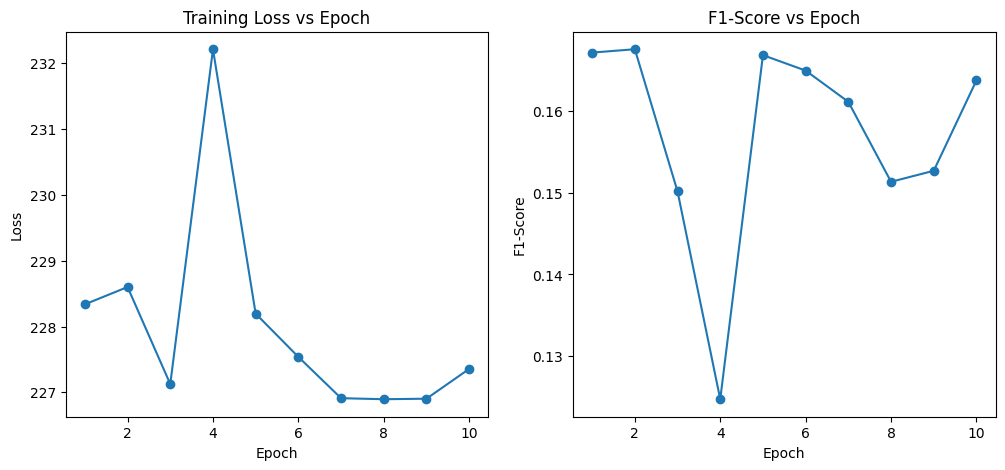

Class 0 F1-Score: 0.0542
Class 1 F1-Score: 0.1232
Class 2 F1-Score: 0.6412
Class 3 F1-Score: 0.0000
Class 4 F1-Score: 0.0000


In [15]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

optimizer = optim.Adam(model.parameters(), lr=1e-3)

criterion = torch.nn.CrossEntropyLoss(weight=weights_tensor)

train_loss_history = []
f1_score_history = []
classwise_f1_scores = []

num_epochs = 10  

test_batch_size = 32

for epoch in tqdm(range(num_epochs)):
    model.train() 
    epoch_loss = 0
    y_true = []
    y_pred = []
    
    for x1, y1, x2, y2 in tqdm(train_loader):
        x1, y1, x2, y2 = x1.to(device), y1.to(device), x2.to(device), y2.to(device)
        
        num_test_samples = x2.shape[1]

        for i in range(0, num_test_samples, test_batch_size):
            x2_batch = x2[0][i:i + test_batch_size]
            y2_batch = y2[0][i:i + test_batch_size]

            optimizer.zero_grad()


            preds = model(x2_batch, (x1, y1)) 
            
            pred_classes = torch.argmax(preds, dim=1)
            
            y2_mapped = torch.tensor([label_mapping[y.item()] for y in y2_batch], device=device).long()
            
            loss = criterion(preds, y2_mapped)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()


            y_true.extend(y2_mapped.cpu().numpy()) 
            y_pred.extend(pred_classes.cpu().numpy())


    avg_epoch_loss = epoch_loss / len(train_loader)
    train_loss_history.append(avg_epoch_loss)


    epoch_f1 = f1_score(y_true, y_pred, average='macro')
    f1_score_history.append(epoch_f1)

    class_f1 = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2, 3, 4])
    classwise_f1_scores.append(class_f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, F1-Score: {epoch_f1:.4f}")

plt.figure(figsize=(12, 5))

# Plot loss vs. epoch
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, marker='o')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot F1-score vs. epoch
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), f1_score_history, marker='o')
plt.title('F1-Score vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')

plt.show()

for idx, class_f1 in enumerate(classwise_f1_scores[-1]):
    print(f"Class {idx} F1-Score: {class_f1:.4f}")


 10%|█         | 1/10 [05:30<49:30, 330.04s/it]

Epoch [1/10], Loss: 230.3948, F1-Score: 0.1122


 20%|██        | 2/10 [11:03<44:17, 332.21s/it]

Epoch [2/10], Loss: 230.0299, F1-Score: 0.0755


 30%|███       | 3/10 [16:38<38:54, 333.50s/it]

Epoch [3/10], Loss: 229.7932, F1-Score: 0.0743


 40%|████      | 4/10 [22:07<33:08, 331.42s/it]

Epoch [4/10], Loss: 229.7527, F1-Score: 0.0719


 50%|█████     | 5/10 [27:29<27:20, 328.13s/it]

Epoch [5/10], Loss: 229.7362, F1-Score: 0.0732


 60%|██████    | 6/10 [32:54<21:48, 327.14s/it]

Epoch [6/10], Loss: 229.7147, F1-Score: 0.0733


 70%|███████   | 7/10 [38:12<16:12, 324.10s/it]

Epoch [7/10], Loss: 229.7005, F1-Score: 0.0720


 80%|████████  | 8/10 [43:30<10:44, 322.33s/it]

Epoch [8/10], Loss: 229.6823, F1-Score: 0.0761


 90%|█████████ | 9/10 [48:48<05:20, 320.93s/it]

Epoch [9/10], Loss: 229.7488, F1-Score: 0.1067


100%|██████████| 10/10 [54:06<00:00, 324.69s/it]

Epoch [10/10], Loss: 229.7233, F1-Score: 0.0785


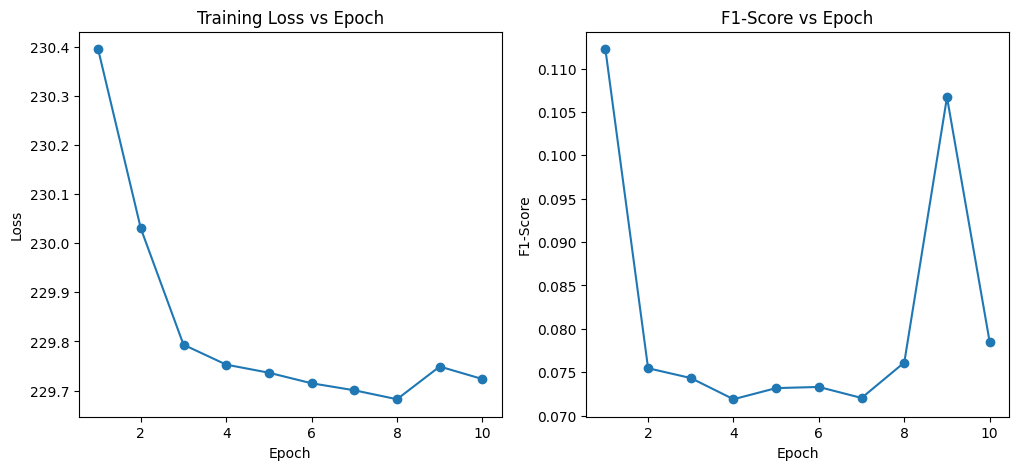

Class 0 F1-Score: 0.0878
Class 1 F1-Score: 0.2902
Class 2 F1-Score: 0.0144
Class 3 F1-Score: 0.0000
Class 4 F1-Score: 0.0000


In [16]:
# with added weights 

import torch
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

optimizer = optim.Adam(model.parameters(), lr=1e-3)

criterion = torch.nn.CrossEntropyLoss(weight=weights_tensor)

train_loss_history = []
f1_score_history = []
classwise_f1_scores = []

num_epochs = 10  

test_batch_size = 32

for epoch in tqdm(range(num_epochs)):
    model.train() 
    epoch_loss = 0
    y_true = []
    y_pred = []
    
    for x1, y1, x2, y2 in tqdm(train_loader):
        x1, y1, x2, y2 = x1.to(device), y1.to(device), x2.to(device), y2.to(device)
        
        num_test_samples = x2.shape[1]

        for i in range(0, num_test_samples, test_batch_size):
            x2_batch = x2[0][i:i + test_batch_size]
            y2_batch = y2[0][i:i + test_batch_size]

            optimizer.zero_grad()


            preds = model(x2_batch, (x1, y1)) 
            
            pred_classes = torch.argmax(preds, dim=1)
            
            y2_mapped = torch.tensor([label_mapping[y.item()] for y in y2_batch], device=device).long()
            
            loss = criterion(preds, y2_mapped)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()


            y_true.extend(y2_mapped.cpu().numpy()) 
            y_pred.extend(pred_classes.cpu().numpy())


    avg_epoch_loss = epoch_loss / len(train_loader)
    train_loss_history.append(avg_epoch_loss)


    epoch_f1 = f1_score(y_true, y_pred, average='macro')
    f1_score_history.append(epoch_f1)

    class_f1 = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2, 3, 4])
    classwise_f1_scores.append(class_f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, F1-Score: {epoch_f1:.4f}")

plt.figure(figsize=(12, 5))

# Plot loss vs. epoch
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, marker='o')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot F1-score vs. epoch
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), f1_score_history, marker='o')
plt.title('F1-Score vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')

plt.show()

for idx, class_f1 in enumerate(classwise_f1_scores[-1]):
    print(f"Class {idx} F1-Score: {class_f1:.4f}")
